# Data info

__[Abalone info](https://archive.ics.uci.edu/dataset/1/abalone)__ <br>
__[Kaggle competition](https://www.kaggle.com/competitions/playground-series-s4e4/overview)__ <br>

| Name | Data Type | Measurement Unit | Description|
|-----|-----------|------------------|------------|
|Sex | nominal | -- | M, F, and I (infant)|
|Length | continuous | mm | Longest shell measurement|
|Diameter	| continuous | mm | perpendicular to length|
|Height | continuous | mm | with meat in shell|
|Whole weight | continuous | grams | whole abalone|
|Shucked weight | continuous	 | grams | weight of meat|
|Viscera weight | continuous | grams | gut weight (after bleeding)|
|Shell weight | continuous | grams | after being dried|
|<span style="color:darkorange"> Rings </span>| integer | -- | +1.5 gives the age in years|

In [3]:
from collections.abc import Iterable
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

C:\Users\Saviery\AppData\Local\Temp\ipykernel_8068\3902914797.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [39]:
data_folder = "Data/"
raw_dataName = "raw_data.csv"

raw_data = pd.read_csv(data_folder + raw_dataName)
print(raw_data.shape)
raw_data.head()

(90615, 10)


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [27]:
target = 'Rings'
not_features = ['id'] + [target]
features = list(raw_data.columns.drop(not_features))
print("features:", features)
cat_features = [f for f in features if (raw_data[f].dtype == 'object') or (raw_data[f].dtype == 'str')]
print("Cat_features:", cat_features)
num_features = [f for f in features if f not in cat_features]
print("Num_features:", num_features) 

features: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
Cat_features: ['Sex']
Num_features: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']


# Check data

## Drops and duplicates

In [27]:
tmp = raw_data.drop_duplicates()
tmp.dropna(inplace=True)
assert raw_data.shape == tmp.shape, "Есть пропуски или дубликаты"
print("OK")

OK


## Time features
Их нет

## Logic check

### Weights

0.789035


count    90615.000000
mean         0.052937
std          0.063754
min         -0.857000
25%          0.012500
50%          0.039500
75%          0.080000
max          0.919500
dtype: float64

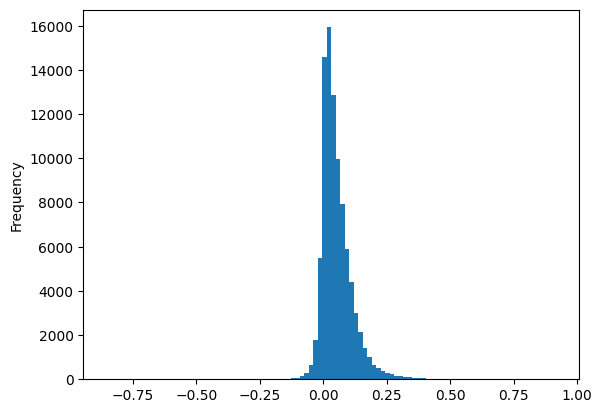

In [427]:
# так, ну в челом логично, одну переменную можно выкинуть
w = raw_data['Whole weight']
other = raw_data['Whole weight.1'] + raw_data['Whole weight.2'] + raw_data['Shell weight']

nol = w - other
nol.plot(kind='hist', bins=100)
print(raw_data['Whole weight'].mean())
nol.describe()

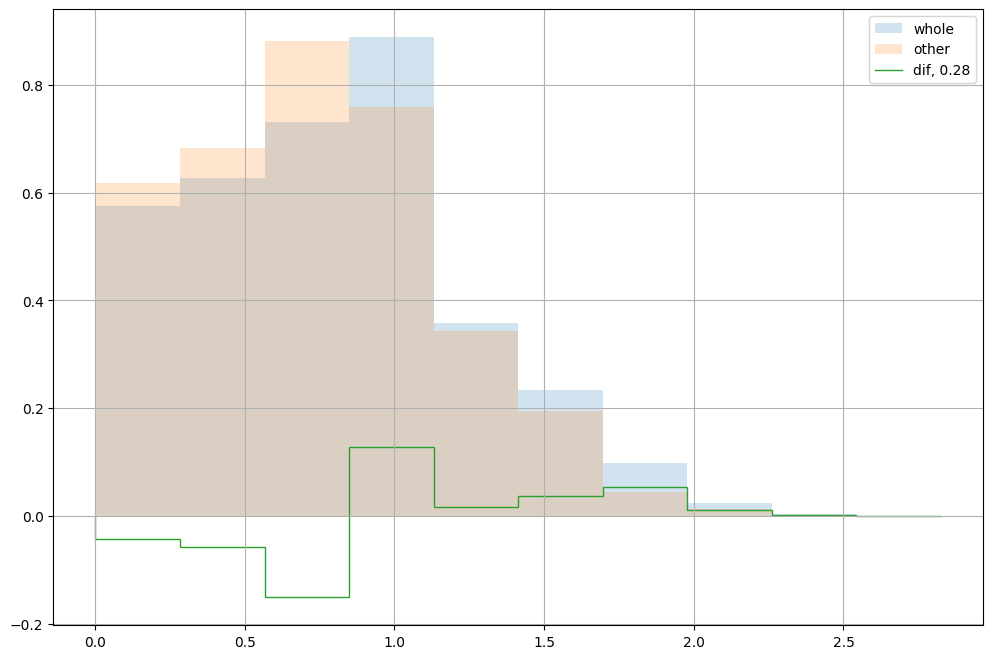

array([ -7.,  -9., -21.,  14.,   4.,  16.,  54.,  45.,  52.,  91.])

In [541]:
density = True
fig, ax = plt.subplots(figsize=(12, 8))
n_w, b, _ = ax.hist(w, label='whole', alpha=0.2, bins=10, density=density)
n_other, _, _ = ax.hist(other, label='other', alpha=0.2, bins=b, density=density)
ax.stairs(n_w - n_other, b, label=f'dif, {(b[1] - b[0]):.2}')
ax.legend()
ax.grid()
plt.show()

d = 1 if density else n_w.sum()
x = (n_w - n_other) / n_w * 100
x.round()

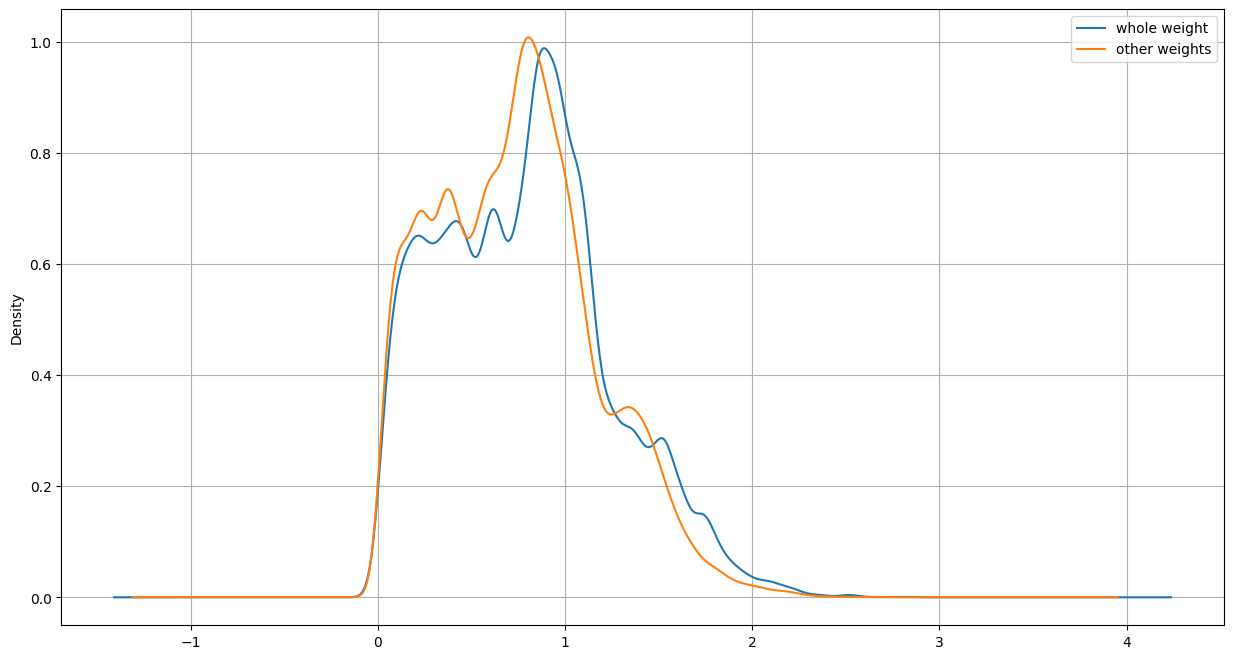

In [525]:
fig, ax = plt.subplots(figsize=(15, 8))

w.plot(kind='kde', ax=ax, label='whole weight')
other.plot(kind='kde', ax=ax, label='other weights')

plt.legend()
plt.grid()
plt.show()

### Length < Diameter

In [15]:
bad_len_cond = raw_data['Length'] < raw_data['Diameter']
print(len(raw_data[bad_len_cond]))
display(raw_data[bad_len_cond]['Rings'].value_counts())
raw_data[bad_len_cond]

20


Rings
4    14
6     3
3     1
7     1
9     1
Name: count, dtype: int64

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
2539,2539,I,0.130,0.150,0.045,0.0240,0.0095,0.0055,0.0050,4
6700,6700,I,0.145,0.155,0.030,0.0390,0.0120,0.0035,0.0070,4
11031,11031,I,0.090,0.100,0.030,0.0325,0.0065,0.0050,0.0015,4
18320,18320,I,0.140,0.145,0.055,0.0215,0.0095,0.0085,0.0050,4
25356,25356,I,0.110,0.130,0.030,0.0080,0.0025,0.0020,0.0030,4
25631,25631,I,0.100,0.105,0.020,0.0055,0.0060,0.0065,0.0050,4
26585,26585,I,0.090,0.100,0.040,0.0130,0.0095,0.0030,0.0030,4
27851,27851,I,0.140,0.155,0.009,0.0185,0.0065,0.0085,0.0050,4
28777,28777,I,0.075,0.115,0.055,0.0180,0.0065,0.0055,0.0135,3
28836,28836,I,0.130,0.140,0.045,0.0210,0.0095,0.0045,0.0095,7


### Feature < 0.0

In [36]:
small = (raw_data[num_features + [target]] <= 0.0).any(axis=1)
print(len(raw_data[small]))
raw_data[small]

6


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
7025,7025,I,0.315,0.230,0.0,0.1340,0.0545,0.0245,0.3505,8
14208,14208,I,0.430,0.340,0.0,0.3440,0.1880,0.0705,0.1050,8
32078,32078,M,0.470,0.355,0.0,0.5785,0.2965,0.1550,0.1360,7
52324,52324,I,0.315,0.230,0.0,0.1340,0.0530,0.0375,0.3505,7
70295,70295,I,0.430,0.340,0.0,0.4060,0.2035,0.0960,0.1230,7
90295,90295,M,0.430,0.325,0.0,0.3335,0.1350,0.0585,0.1050,10


## Categorical features
Он тут один, поэтому корреляцию не смотрим

In [46]:
cat_features

['Sex']


In [139]:
def distribution_tables(data: pd.DataFrame) -> None:
    cols = list(data.columns)
    for f in cols:
        counts = data[f].value_counts()
        percent = counts / counts.sum()
        fmt = '{:.1%}'.format
        print(pd.DataFrame({'counts': counts, 'per': percent.map(fmt)}))

distribution_tables(raw_data[cat_features])

     counts    per
Sex               
I     33093  36.5%
M     31027  34.2%
F     26495  29.2%


## Continuous featueres

In [52]:
num_features

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight']

In [68]:
size_table = pd.DataFrame(columns=['Name', 'dtype', 'max', 'min'])
for f in num_features:
    col  = raw_data[f]
    size_table.loc[len(size_table)] = [f, col.dtype, col.max(), col.min()]
size_table

,Name,dtype,max,min
0,Length,float32,0.8150,0.0750
1,Diameter,float32,0.6500,0.0550
2,Height,float32,1.1300,0.0000
3,Whole weight,float32,2.8255,0.0020
4,Whole weight.1,float32,1.4880,0.0010
5,Whole weight.2,float32,0.7600,0.0005
6,Shell weight,float32,1.0050,0.0015


In [167]:
# уменьшаем память для датасета меняя float64 на float32
raw_data[num_features] = raw_data[num_features].astype('float32')

### Correlation

In [233]:
raw_data[num_features + [target]].corr(method='pearson')

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


### Distribution

<Axes: title={'center': 'Box plot (quartiles)'}>

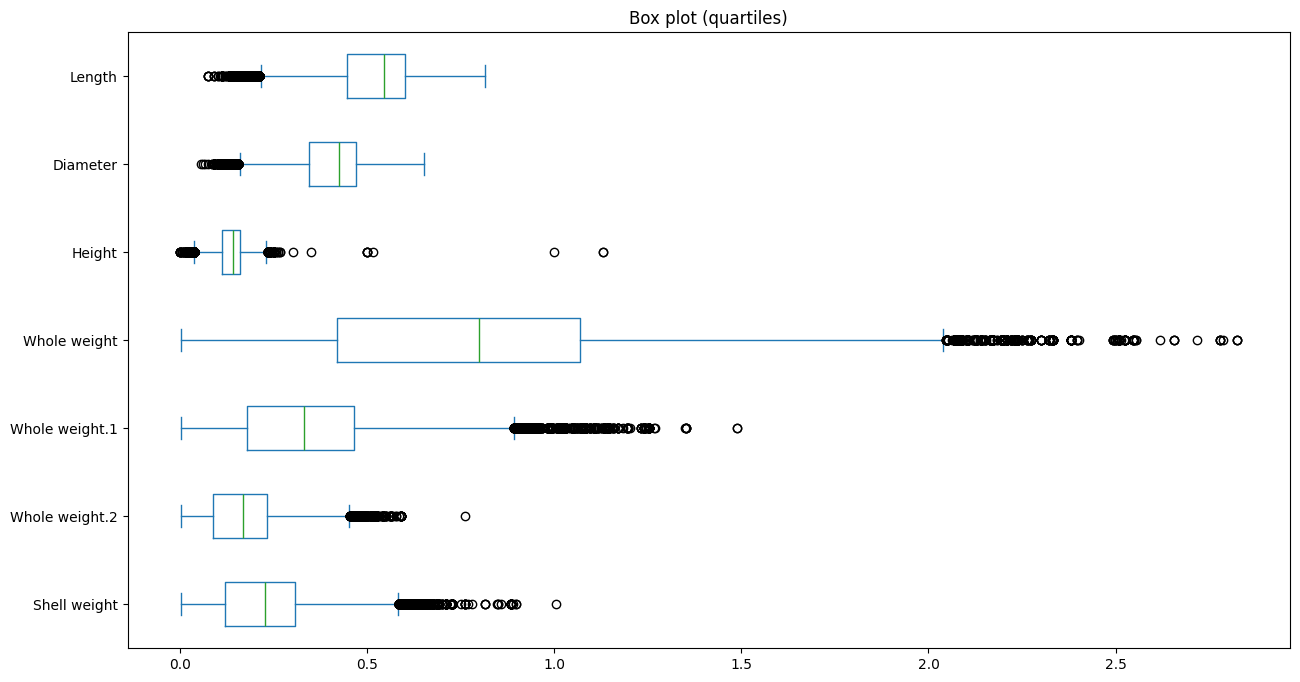

In [124]:
raw_data[num_features[-1::-1]].plot(kind='box',vert=False, figsize=(15, 8), title='Box plot (quartiles)')

<Axes: title={'center': 'Density plot'}, ylabel='Density'>

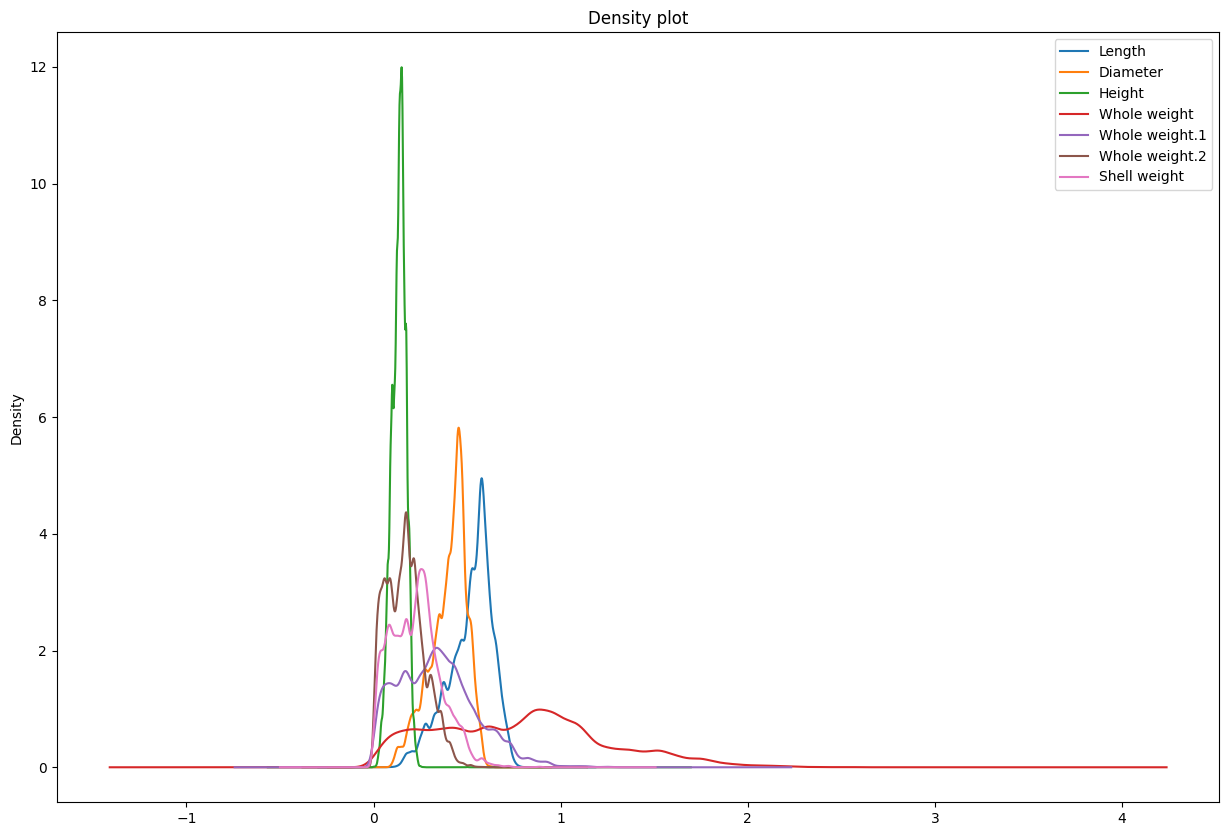

In [129]:
raw_data[num_features].plot(kind='density', figsize=(15, 10), title='Density plot')

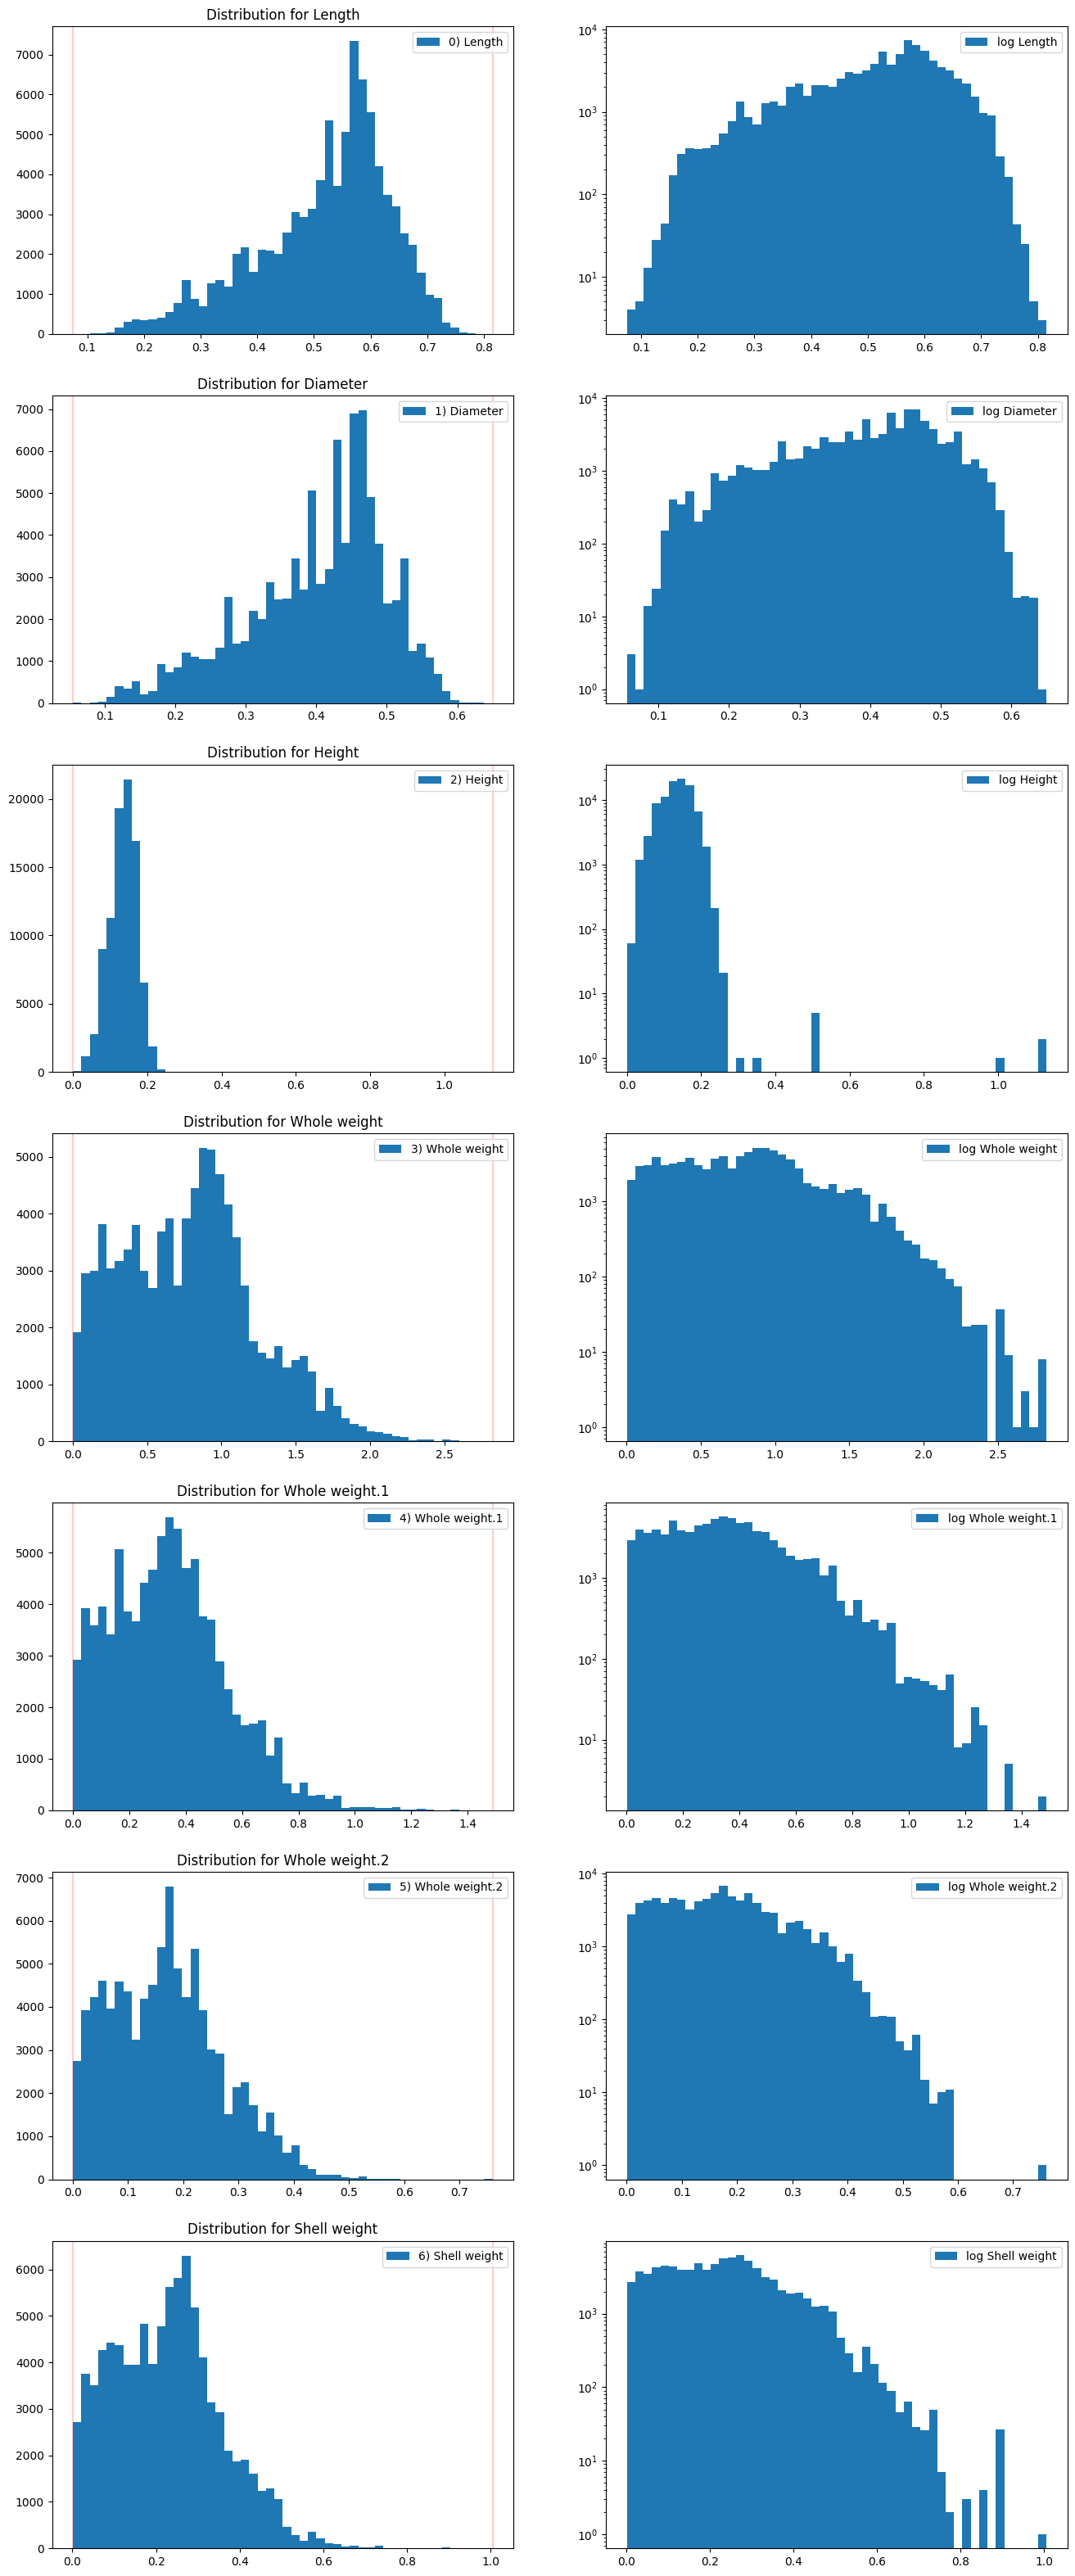

In [216]:
def distribution_plots(data: pd.DataFrame, n_bins: Iterable[int] = None, figsize: tuple = (16, 40)) -> None:
    cols = list(data.columns)

    fig, axes = plt.subplots(len(cols), 2, figsize=figsize)

    if len(cols) == 1:
        axes = axes.reshape(1, 2)

    for i, f in enumerate(cols):
        if (n_bins != None) and (n_bins[i] != None):
            bins = n_bins[i]
        else:
            bins = 'auto'
        axes[i, 0].axvline(x = data[f].max(), color='red', alpha=0.2)
        axes[i, 0].axvline(x = data[f].min(), color='red', alpha=0.2)
        axes[i, 0].hist(data[f].values, bins=bins, label=f'{i}) {f}')
        axes[i, 0].set_title(f'Distribution for {f}')
        axes[i, 0].legend(loc='upper right')

        axes[i, 1].set_yscale('log')
        axes[i, 1].hist(data[f].values, bins=bins, label=f'log {f}')
        axes[i, 1].legend(loc='upper right')
    plt.show()

distribution_plots(raw_data[num_features], n_bins = [50, 50, 50, 50, 50, 50, 50])

In [130]:
# TODO: подумать над выбросам

## Target

In [170]:
print("target dtype:", raw_data[target].dtype)
raw_data[target].describe()

target dtype: int8


count    90615.000000
mean         9.696794
std          3.176221
min          1.000000
25%          8.000000
50%          9.000000
75%         11.000000
max         29.000000
Name: Rings, dtype: float64

In [169]:
# тут тоже, немного сэкономим
raw_data[target] = raw_data[target].astype('int8')

In [181]:
distribution_tables(pd.DataFrame(raw_data[target]))

       counts    per
Rings               
9       17465  19.3%
8       14499  16.0%
10      12464  13.8%
7        9008   9.9%
11       8407   9.3%
6        5411   6.0%
12       4719   5.2%
13       4074   4.5%
5        2862   3.2%
14       2507   2.8%
15       2072   2.3%
16       1439   1.6%
4        1402   1.5%
17       1175   1.3%
18        848   0.9%
19        639   0.7%
20        507   0.6%
3         386   0.4%
21        255   0.3%
23        180   0.2%
22        108   0.1%
27         41   0.0%
2          29   0.0%
24         29   0.0%
1          25   0.0%
29         24   0.0%
25         22   0.0%
26         18   0.0%


min: 1, max: 29
missed elements: {28}


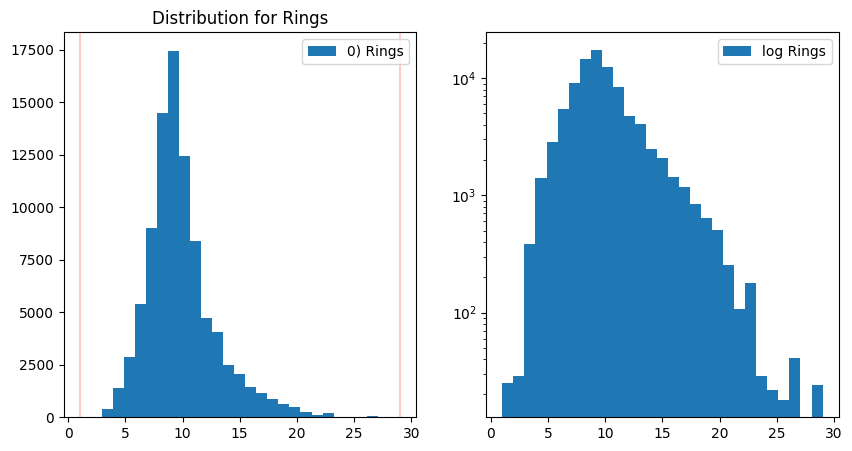

In [220]:
tar_min = raw_data[target].min()
tar_max = raw_data[target].max()
print(f'min: {tar_min}, max: {tar_max}')
miss = set(range(tar_min, tar_max + 1)) - set(raw_data[target].unique())
print("missed elements:", miss)
distribution_plots(pd.DataFrame(raw_data[target]), n_bins=[tar_max - tar_min + 1], figsize=(10, 5))

In [234]:
# ну тут все логично, дети меньше, M и F почти одинаковые
for f in cat_features:
    print(raw_data[[f] + [target]].groupby(f).describe())

       Rings                                                 
       count       mean       std  min  25%   50%   75%   max
Sex                                                          
F    26495.0  11.161389  3.021624  1.0  9.0  10.0  12.0  29.0
I    33093.0   7.533557  2.131495  1.0  6.0   7.0   8.0  29.0
M    31027.0  10.753408  2.980265  1.0  9.0  10.0  12.0  29.0


Error in callback <function _draw_all_if_interactive at 0x000001EF4EC9A8E0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

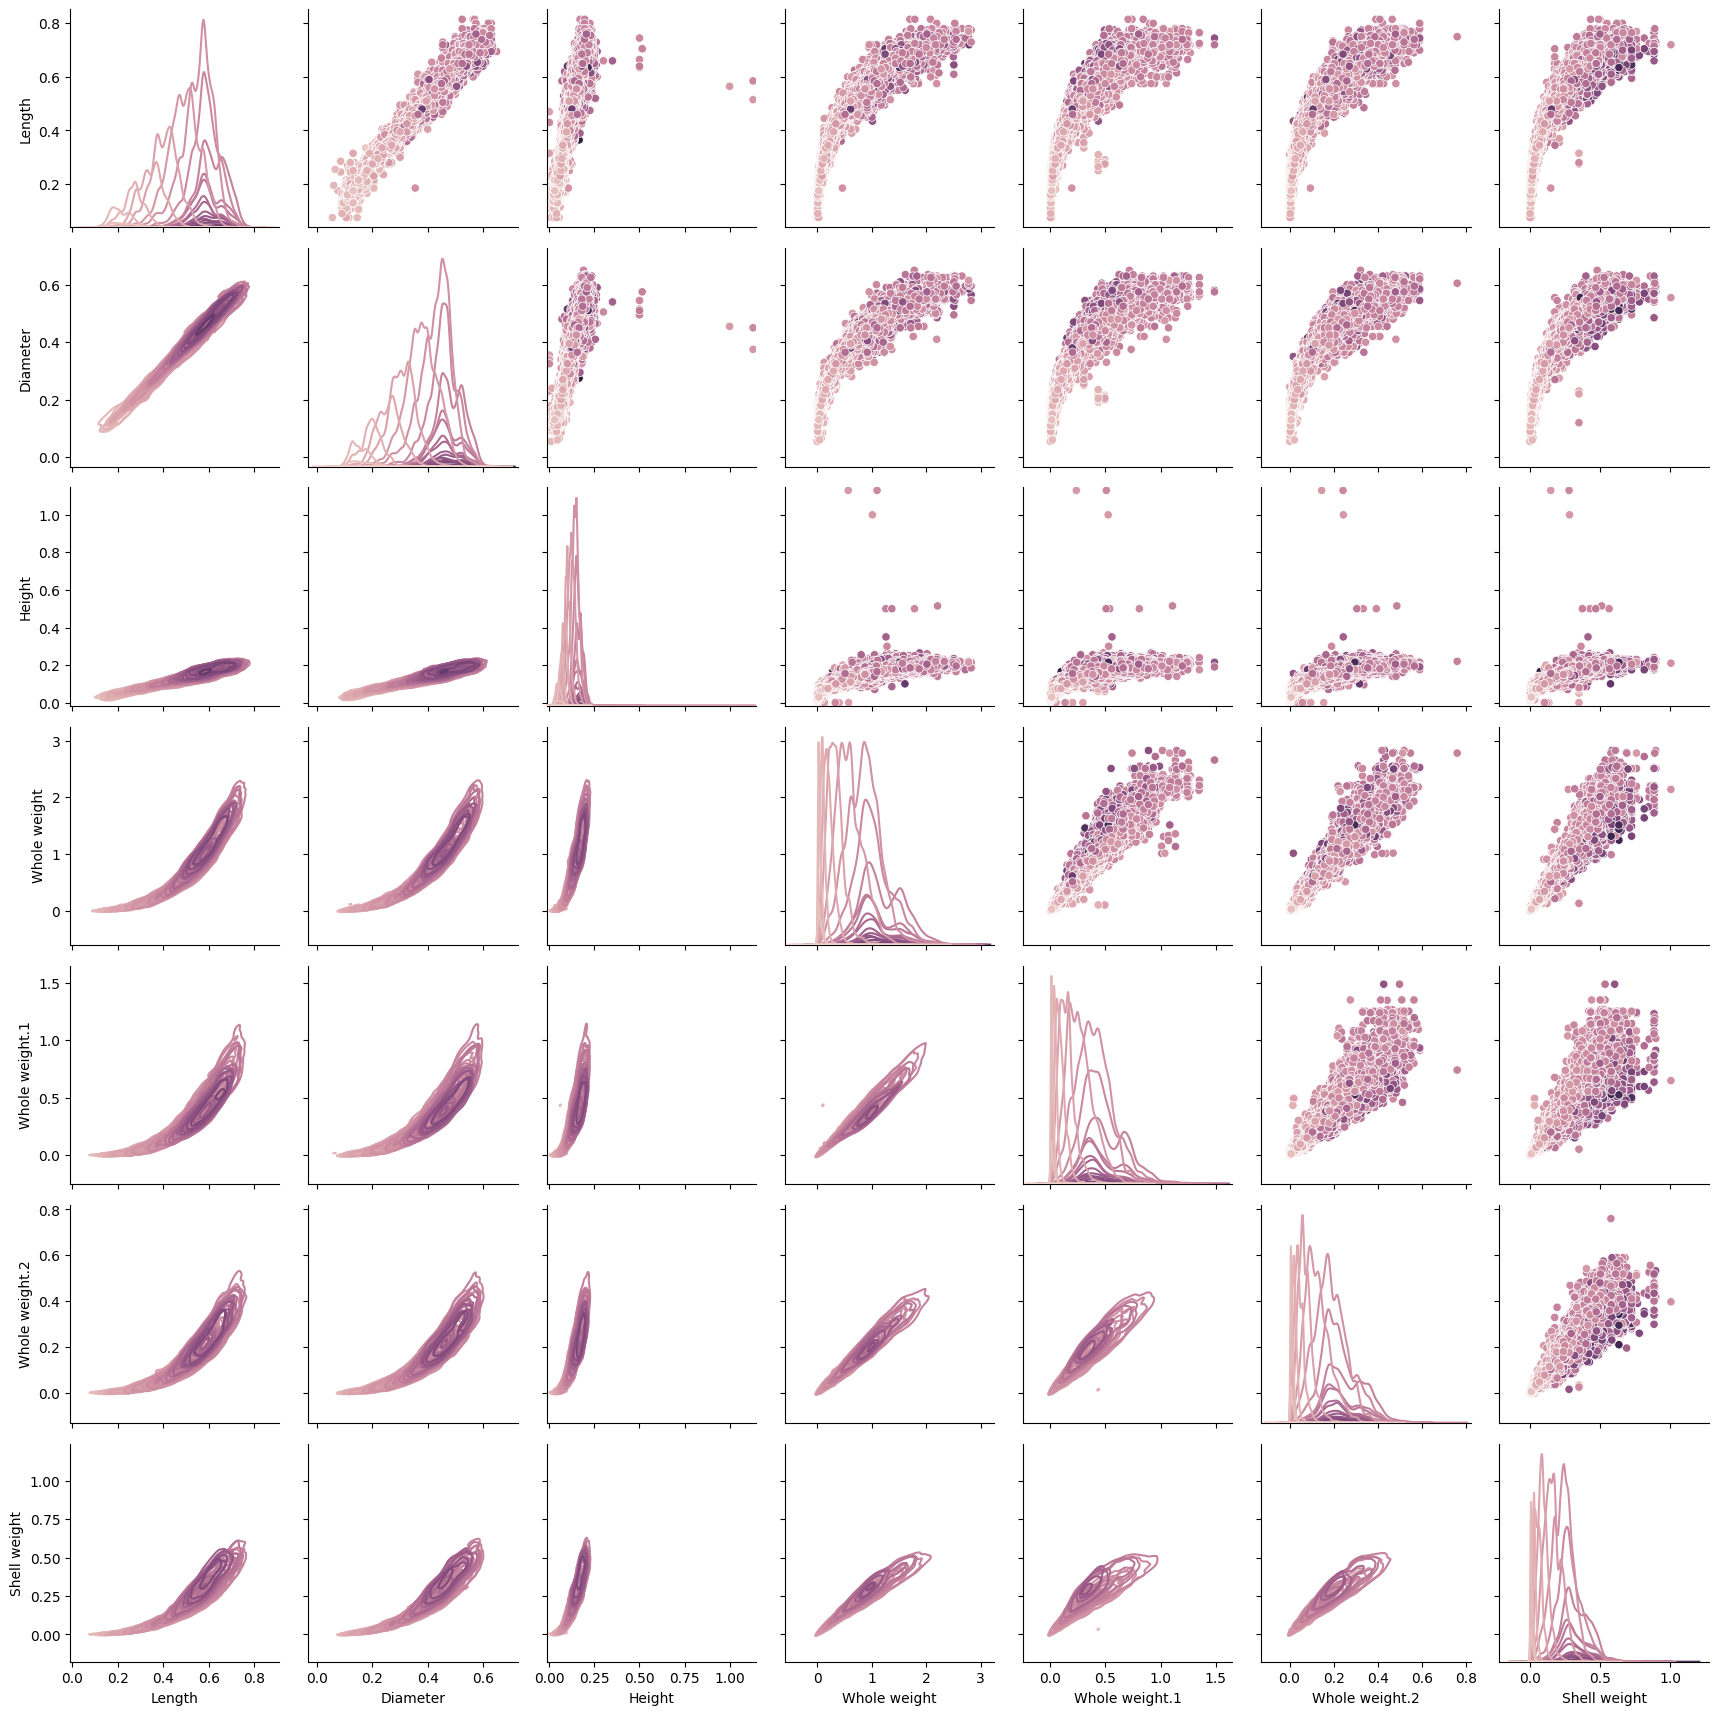

In [244]:
# g = sns.PairGrid(raw_data[features + [target]], hue=target, diag_sharey=False)
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)

## Summary

> __Сжатие данных__
> - **Rings** -> int8
> - **Num_features** -> float32 <br>
<br>

> __Категориальные признаки__
> - **Распределение** <br> поровну на все группы <br>
<br>

> __Числовые признаки__
> - **Корреляция** <br> <span style="color:red"> сильная </span>, так как размер моллюска и его масса пропорциональны
> - **Распределение** <br>
<span style="color:limegreen"> Length, Diameter </span> - нормальные <br>
<span style="color:red"> Height </span> много выбросов, возможно, их надо убрать <br>
<span style="color:gold"> Whole weight, Whole weight.1, Whole weight.2, Shell weight </span> не очень, но можно жить <br>
<br>

> __Целевая переменная__
> - отсутствует значение <span style="color:red"> 28 </span> <br>
<br>

> __Замечания__
> - <span style="color:red"> Whole weight </span> = Whole weight.1 + Whole weight.2 + Shell weight
> - Есть 20 элементов, у которых <span style="color:red"> Lenght < Diameter </span>, что не сходится условием задачи 
> - Есть 6 элементов, у которых  <span style="color:red"> Height == 0.0 </span> <br>
<br>

In [40]:
print(raw_data.shape)

bad_len_cond = raw_data['Length'] < raw_data['Diameter']
raw_data.drop(raw_data[bad_len_cond].index, inplace=True)
print(raw_data.shape)

zero_cond = (raw_data[num_features + [target]] <= 0.0).any(axis=1)
raw_data.drop(raw_data[zero_cond].index, inplace=True)
print(raw_data.shape)

(90615, 10)
(90595, 10)
(90589, 10)


In [38]:
raw_data.to_csv(data_folder + 'data.csv', index=False)

# Train and Test split

In [570]:
fmt = '{:.2%}'.format

def calc_prop(train: pd.Series, test: pd.Series) -> pd.Series:
    return test.divide(train) - 1


def show_bad_stat(bad_features: dict) -> None:
    if len(bad_features) > 0:
        print("Baaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaad")
        for f, s in bad_features.items():
            print(f, end=':\n')
            for key, val in s.items():
                print(f'\t{key}: {fmt(val)}')
            print()
    else:
        print("Ok")


def _update_bad_stat_(bad_features: dict, prop: pd.Series, f: str, treshold: float) -> dict:
    bad_categories = prop[np.abs(prop) > treshold]
    if len(bad_categories) > 0:
        bad_features[f] = bad_categories.to_dict()

In [569]:
def train_test_cat_f_tables(train: pd.DataFrame, test: pd.DataFrame, treshold: float = 0.02) -> None:
    """
        treshold: float = 0.02 - на сколько маскимально может отличаться соотношение в каждой категории признака
                                 по умаолчанию 2%
    """
    percent = lambda x: x / x.sum()
    fmt = '{:.2%}'.format
    bad_features = dict()

    # поменять цвет плохих строк
    # def row_style(row):
    #     print('here')
    #     if np.abs(row.prop) > treshold:
    #         print('im here')
    #         return pd.Series('background-color: red', row.index)    
    #     return pd.Series('', row.index)
        
    cols = list(train.columns)
    for f in cols:
        train_counts = train[f].value_counts()
        test_counts = test[f].value_counts()

        train_per = percent(train_counts)
        test_per = percent(test_counts)

        dif = test_per - train_per
        prop = calc_prop(train_per, test_per)

        df = pd.DataFrame({'train_counts': train_counts, 'train_per': train_per.map(fmt),
                           'test_counts': test_counts, 'test_per': test_per.map(fmt),
                           'dif': dif.map(fmt), 'prop': prop.map(fmt)})
        
        # df.style.apply(row_style, axis=1)
        display(df)

        _update_bad_stat_(bad_features, prop, f, treshold)

    show_bad_stat(bad_features)

In [568]:
def train_test_num_f_tables(train: pd.DataFrame, test: pd.DataFrame, treshold: float = 0.02, ignore: list[str] = []):
    bad_features = dict()
    cols = list(train.columns)
    for f in cols:
        train_stat = train[f].describe().drop(['count'] + ignore)
        test_stat = test[f].describe().drop(['count'] + ignore)
        prop = calc_prop(train_stat, test_stat)

        df = pd.DataFrame({f'{f} train': train_stat, f'{f} test': test_stat, 'prop': prop.map(fmt)})
        display(df)

        _update_bad_stat_(bad_features, prop, f, treshold)

    show_bad_stat(bad_features)

In [548]:
def train_test_distribution_plots(train: pd.DataFrame, test: pd.DataFrame, n_bins: Iterable[int] | None = None, figsize: tuple = (16,40)) -> None:
    cols = list(train.columns)
    data = [train, test]
    data_names = ['train', 'test']
    color = ['limegreen', 'deepskyblue']

    fig, ax = plt.subplots(len(cols), figsize=figsize)

    if len(cols) == 1:
        ax = [ax]

    for i, f in enumerate(cols):
        if (n_bins != None) and (n_bins[i] != None):
            bins = n_bins[i]
        else:
            bins = 'auto'

        for k in range(len(data)):
            ax[i].hist(data[k][f].values, color=color[k], alpha=0.3, label=data_names[k], bins=bins)
            ax[i].axvline(x = data[k][f].max(), color=color[k])
            ax[i].axvline(x = data[k][f].min(), color=color[k])
            ax[i].set_title(f'{i}) Distribution for {f}')
            ax[i].legend(loc='upper right')

    plt.show()

In [ ]:
data = pd.read_csv(data_folder + 'data.csv')

In [550]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.33, random_state=37)

,train_counts,train_per,test_counts,test_per,dif,prop
Sex,,,,,,
I,22201,36.57%,10892,36.42%,-0.14%,-0.39%
M,20767,34.21%,10260,34.31%,0.11%,0.31%
F,17744,29.23%,8751,29.26%,0.04%,0.13%


Ok


,Length train,Length test,prop
mean,0.517193,0.516906,-0.06%
std,0.118299,0.118052,-0.21%
25%,0.445000,0.445000,0.00%
50%,0.540000,0.545000,0.93%
75%,0.600000,0.600000,0.00%


,Diameter train,Diameter test,prop
mean,0.401757,0.401521,-0.06%
std,0.098064,0.097951,-0.12%
25%,0.345000,0.340000,-1.45%
50%,0.425000,0.425000,0.00%
75%,0.470000,0.470000,0.00%


,Height train,Height test,prop
mean,0.135437,0.135518,0.06%
std,0.038175,0.037665,-1.34%
25%,0.110000,0.110000,0.00%
50%,0.140000,0.140000,0.00%
75%,0.160000,0.160000,0.00%


,Whole weight train,Whole weight test,prop
mean,0.789258,0.788582,-0.09%
std,0.458047,0.456914,-0.25%
25%,0.419500,0.417000,-0.60%
50%,0.797000,0.802000,0.63%
75%,1.067500,1.068000,0.05%


,Whole weight.1 train,Whole weight.1 test,prop
mean,0.341062,0.340201,-0.25%
std,0.204816,0.203641,-0.57%
25%,0.177500,0.177500,0.00%
50%,0.330000,0.330000,0.00%
75%,0.463500,0.462500,-0.22%


,Whole weight.2 train,Whole weight.2 test,prop
mean,0.169452,0.169360,-0.05%
std,0.100914,0.100901,-0.01%
25%,0.086500,0.086500,0.00%
50%,0.166000,0.166000,0.00%
75%,0.232500,0.232500,0.00%


,Shell weight train,Shell weight test,prop
mean,0.226021,0.225648,-0.17%
std,0.130421,0.129762,-0.51%
25%,0.120000,0.120000,0.00%
50%,0.225000,0.225000,0.00%
75%,0.305000,0.305000,0.00%


Ok


,Rings train,Rings test,prop
mean,9.691148,9.708257,0.18%
std,3.172594,3.183594,0.35%
min,1.000000,1.000000,0.00%
25%,8.000000,8.000000,0.00%
50%,9.000000,9.000000,0.00%
75%,11.000000,11.000000,0.00%
max,29.000000,29.000000,0.00%


Ok


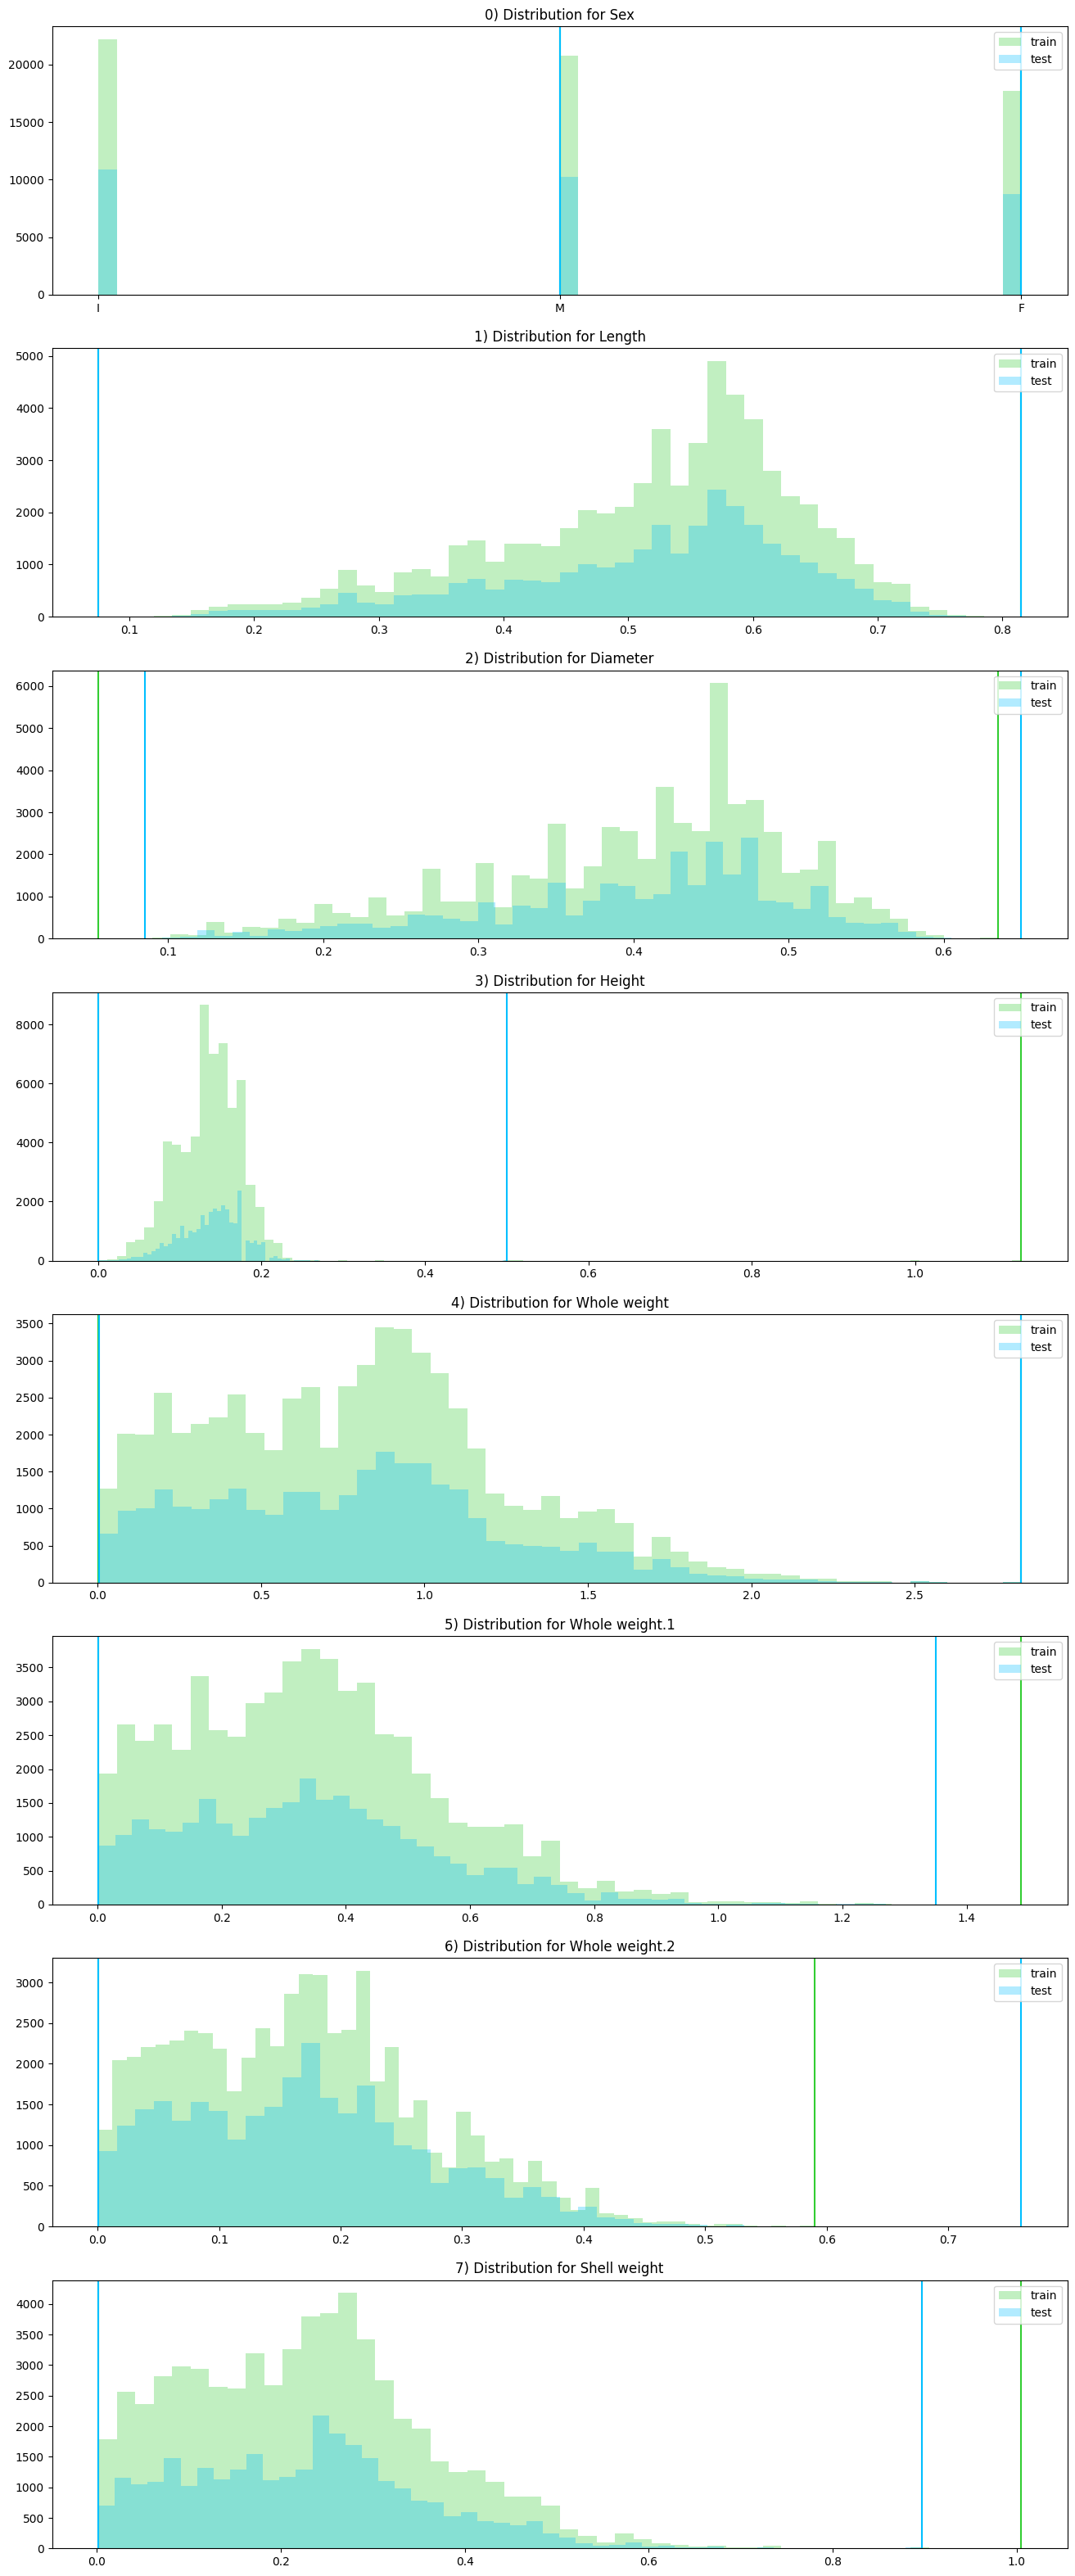

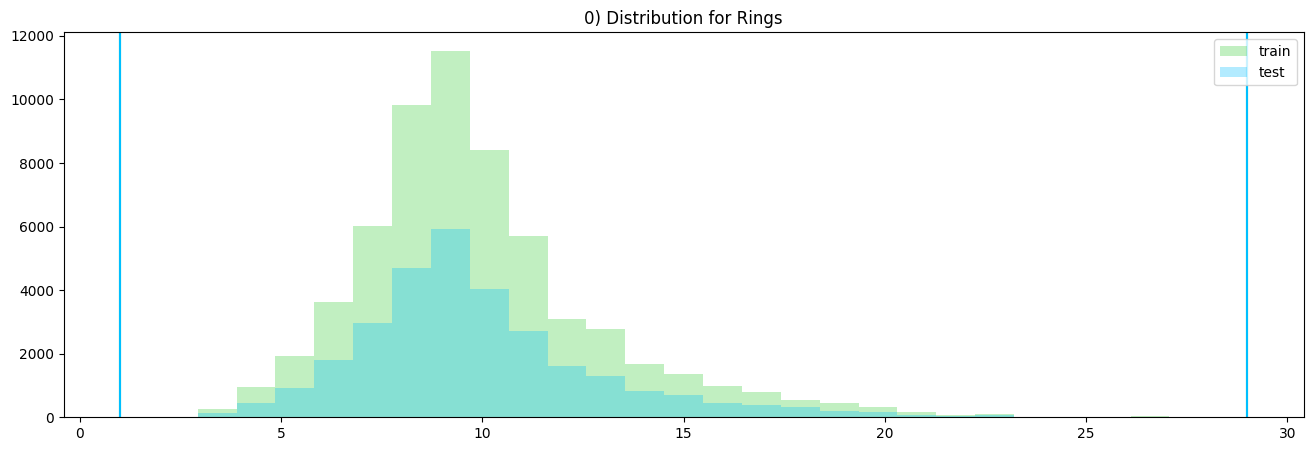

In [576]:
train_test_cat_f_tables(X_train[cat_features], X_test[cat_features])
# train_test_cat_f_tables(pd.DataFrame(y_train), pd.DataFrame(y_test))

train_test_num_f_tables(X_train[num_features], X_test[num_features], treshold=0.03, ignore=['min', 'max'])
train_test_num_f_tables(pd.DataFrame(y_train), pd.DataFrame(y_test))

train_test_distribution_plots(X_train[features], X_test[features], n_bins=[50, 50, 50, 100, 50, 50, 50, 50])
train_test_distribution_plots(pd.DataFrame(y_train), pd.DataFrame(y_test), n_bins=[29], figsize=(16, 5))